In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from pandas.tseries.offsets import DateOffset
import matplotlib.dates as mdates

def load_and_prepare_data(file_name): # need to include a line to remove the first day after installation
    try:
        df = pd.read_csv(file_name, header=3)
        color_dict = {'Green': 0, 'Yellow': 1, 'Red': 2, 'Error':3}
        df['alignment_mapped'] = df['Alignment'].map(color_dict)  # line causing the error
        df['time_local'] = pd.to_datetime(df['time_local'])
        device_name = f"{df['name'].iloc[0]}_{df['instance'].iloc[0]}"
        return df, device_name
    except KeyError as e:
        print(f"KeyError: {e}. Could not find the column in the DataFrame.")
        return None, None  # Return `None` to signify that the DataFrame couldn't be prepared

def remove_red_alignment(df):
    return df[df['alignment_mapped'] != 2]

def remove_button_true(df):
    return df[df['Pressed?'] != True]

def calculate_differences(df):
    df['Difference'] = df['um'].diff()
    df['Absolute Difference'] = df['Difference'].abs()
    
    return df

def calculate_and_print_stats(df):
    mean_difference = df['Difference'].mean()
    std_dev_difference = df['Difference'].std()

    print(df['Difference'].describe())

    # quartiles and IQR
    Q1 = df['Difference'].quantile(0.25)
    Q3 = df['Difference'].quantile(0.75)
    IQR = Q3 - Q1

    # range for outliers
    lower_bound = Q1 - 6.0 * IQR
    upper_bound = Q3 + 6.0 * IQR

    # Count of the outliers based on IQR
    outliers_iqr = df[(df['Difference'] < lower_bound) | (df['Difference'] > upper_bound)]
    #fraction_of_outliers = len(outliers_iqr) / len(df)

    #print(f"Fraction of outliers based on IQR: {fraction_of_outliers}, where number of outliers is {len(outliers_iqr)} and total number of values is {len(df)}")

    # Total number of 'Difference' values
    total_values = df['Difference'].count()

    # Number of zero 'Difference' values
    zero_values = (df['Difference'] == 0).sum()

    # Ratios
    ratio_zeros = zero_values / total_values
    ratio_outliers_iqr = len(outliers_iqr) / total_values

    print(f'The number of outliers based on IQR is: {len(outliers_iqr)}')
    print(f'Ratio of zero differences: {ratio_zeros:.2f}')
    print(f'Ratio of outliers based on IQR: {ratio_outliers_iqr:.2f}')

 

def plot_displacement(df, device_name):
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    instance_name = df['instance'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 10))
    # plot displacement
    ax.plot(df['time_local'], df['um'], label='Displacement')

    # plot alignment
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 0),
                    color='green', alpha=0.5, label='Green Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 1),
                    color='yellow', alpha=1, label='Yellow Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 2),
                    color='red', alpha=1, label='Red Alignment')
    ax.fill_between(df['time_local'], df['um'].max(), df['um'].min(), where=(df['alignment_mapped'] == 3),
                    color='purple', alpha=1, label='Error Alignment')
    # format x-axis as dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # tick every week
    plt.gcf().autofmt_xdate()  # rotate the x labels
    ax.set_title(f'{device_name}: {instance_name} from {min_date} to {max_date}')
    ax.legend()
    plt.tight_layout()
    plt.show()

def plot_histogram(df, device_name):
    instance_name = df['instance'].iloc[0]
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')

    plt.figure(figsize=(15, 6))
    sns.histplot(df['Difference'].dropna(), bins=50)
    plt.title(f'{device_name}: {instance_name}. Data from {min_date} to {max_date}')
    plt.show()
    
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df['Difference'])
    plt.title(f'{device_name}:{instance_name}. Data from {min_date} to {max_date}')
    plt.show()

'''def outliers_analysis(df):
    Q1 = df['Difference'].quantile(0.25)
    Q3 = df['Difference'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 6.0 * IQR
    upper_bound = Q3 + 6.0 * IQR
    outliers = df[(df['Difference'] < lower_bound) | (df['Difference'] > upper_bound)]
    fraction_of_outliers = len(outliers) / len(df)
    print(f"Fraction of outliers: {fraction_of_outliers}, where number of outliers is {len(outliers)} and total number of values is {len(df)}")


def plot_cleaned_difference(df, device_name):
    mean_difference = df['Difference'].mean()
    std_dev_difference = df['Difference'].std()
    df = df[np.abs(df['Difference'] - mean_difference) <= 2*std_dev_difference]
    instance_name = df['instance'].iloc[0]
    min_date = df['time_local'].min().strftime('%Y-%m-%d')
    max_date = df['time_local'].max().strftime('%Y-%m-%d')
    
    plt.figure(figsize=(15, 6))
    sns.histplot(df['Difference'].dropna(), bins=20)
    plt.title(f'{device_name}: {instance_name}. Data from {min_date} to {max_date} (excluding outliers)')
    plt.show()
   
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df['Difference'])
    plt.title(f'{device_name}: {instance_name}. Data from {min_date} to {max_date} (excluding outliers)')
    plt.show()'''


def plot_cleaned_difference(df, device_name):
    Q1 = df['Difference'].quantile(0.25)
    Q3 = df['Difference'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 6.0*IQR
    upper_bound = Q3 + 6.0*IQR
    
    df_filtered = df[(df['Difference'] >= lower_bound) & (df['Difference'] <= upper_bound)]
    
    instance_name = df_filtered['instance'].iloc[0]
    min_date = df_filtered['time_local'].min().strftime('%Y-%m-%d')
    max_date = df_filtered['time_local'].max().strftime('%Y-%m-%d')
    
    plt.figure(figsize=(15, 6))
    sns.histplot(df_filtered['Difference'].dropna(), bins=20)
    plt.title(f'{device_name}: {instance_name}. Data from {min_date} to {max_date}')
    plt.show()
   
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df_filtered['Difference'])
    plt.title(f'{device_name}: {instance_name}. Data from {min_date} to {max_date}')
    plt.show()


def identify_and_adjust_outliers(df):
    # Calculate the differences and identify the outliers
    df['Difference'] = df['um'].diff()
    Q1 = df['Difference'].quantile(0.25)
    Q3 = df['Difference'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df['Difference'] < Q1 - 12.0 * IQR) | (df['Difference'] > Q3 + 12.0 * IQR)].index

    # new column for the adjustment values
    df['Adjustment'] = 0.0

    # Iterate over the outlier indices
    for idx in outlier_indices:
        if idx != 0:  # we can't do this for the first index
            # The adjustment is the difference at the current index
            adjustment = df.loc[idx, 'Difference']

            # Subtract the adjustment from the current and all following displacement values
            df.loc[idx:, 'Adjustment'] += adjustment

    # The cleaned displacement values are the original displacement minus the adjustment
    df['Cleaned Displacement'] = df['um'] - df['Adjustment']

    return df

# the following function breaks up the outliers into two types - outliers which shift the whole datasets and just single jumps/points

def identify_and_adjust_outliers_2(df):
    # Calculate the differences and identify the potential outliers
    df['Difference'] = df['um'].diff()
    Q1 = df['Difference'].quantile(0.25)
    Q3 = df['Difference'].quantile(0.75)
    IQR = Q3 - Q1
    potential_outliers = df[(df['Difference'] < Q1 - 4.0 * IQR) | (df['Difference'] > Q3 + 4.0 * IQR)]
    
    df['Adjustment'] = 0.0
    
    # Iterate over the potential outliers
    for idx in potential_outliers.index:
        # Check surrounding points to classify the outlier
        surrounding = df.iloc[idx-2:idx+3]  # Two points before and two after
        surrounding_outliers = surrounding[(surrounding['Difference'] < Q1 - 4.0 * IQR) | (surrounding['Difference'] > Q3 + 4.0 * IQR)]

        # If several consecutive measurements are outliers, adjust for permanent shift
        if len(surrounding_outliers) > 2:
            adjustment = df.loc[idx, 'Difference']
            df.loc[idx:, 'Adjustment'] += adjustment
        
        # If it's an isolated outlier, set it to the average of its neighbors (smoothing)
        else:
            df.loc[idx, 'um'] = (df.loc[idx-1, 'um'] + df.loc[idx+1, 'um']) / 2
    
    # The cleaned displacement values are the original displacement minus the adjustment
    df['Cleaned Displacement'] = df['um'] - df['Adjustment']

    return df

#the function bellow is the first vleaning function which was using standard deviation

'''def identify_and_adjust_outliers(df):
    # Calculate the differences and identify the outliers
    df['Difference'] = df['um'].diff()
    mean_difference = df['Difference'].mean()
    std_dev_difference = df['Difference'].std()
    outlier_indices = df[np.abs(df['Difference'] - mean_difference) > 2 * std_dev_difference].index

    # new column for the adjustment values 
    df['Adjustment'] = 0.0

    # Iterate over the outlier indices
    for idx in outlier_indices:
        if idx != 0:  # we can't do this for the first index
            # The adjustment is the difference at the current index
            adjustment = df.loc[idx, 'Difference']
            
            # Subtract the adjustment from the current and all following displacement values
            df.loc[idx:, 'Adjustment'] += adjustment

    # The cleaned displacement values are the original displacement minus the adjustment
    df['Cleaned Displacement'] = df['um'] - df['Adjustment']
    
    return df'''


def plot_cleaned_displacement(df, device_name):
    
    instance_name = df['instance'].iloc[0]
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    ax[0].plot(df['time_local'], df['um'])
    ax[0].set_title(f'{device_name}: {instance_name}.Original Displacement')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Displacement')

    ax[1].plot(df['time_local'], df['Cleaned Displacement'])
    ax[1].set_title(f'{device_name}: {instance_name}. Cleaned Displacement')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Displacement')
    
    for axis in ax:
        labels = axis.get_xticklabels()
        plt.setp(labels, rotation=45, ha='right')  # Rotate labels by 45 degrees

    plt.tight_layout()
    plt.show()
    
#this next function does a better job at visualizing the data

def plot_original_vs_cleaned(df):
    plt.figure(figsize=(15, 6))
    
    # Plot the original data
    plt.plot(df['time_local'], df['um'], label='Original Data', color='blue', alpha=0.7)
    
    # Plot the cleaned data
    plt.plot(df['time_local'], df['Cleaned Displacement'], label='Cleaned Data', color='red', linestyle='--')
    
    # Add labels, title, legend, etc.
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.title('Original vs. Cleaned Data')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
'''def main():
    df, device_name = load_and_prepare_data('BB2.csv')  # also get device_name
    df = calculate_differences(df)
    
    calculate_and_print_stats(df)

    plot_displacement(df, device_name)
    plot_histogram(df, device_name)
    outliers_analysis(df)
    plot_cleaned_difference(df, device_name)
    identify_and_adjust_outliers(df)
    plot_cleaned_displacement(df, device_name)
    

if __name__ == "__main__":
    main()
'''



'def main():\n    df, device_name = load_and_prepare_data(\'BB2.csv\')  # also get device_name\n    df = calculate_differences(df)\n    \n    calculate_and_print_stats(df)\n\n    plot_displacement(df, device_name)\n    plot_histogram(df, device_name)\n    outliers_analysis(df)\n    plot_cleaned_difference(df, device_name)\n    identify_and_adjust_outliers(df)\n    plot_cleaned_displacement(df, device_name)\n    \n\nif __name__ == "__main__":\n    main()\n'

count    6428.000000
mean       -0.638305
std        53.053516
min      -999.023438
25%        -2.441406
50%         0.488281
75%         1.953125
max       876.464844
Name: Difference, dtype: float64
The number of outliers based on IQR is: 71
Ratio of zero differences: 0.06
Ratio of outliers based on IQR: 0.01


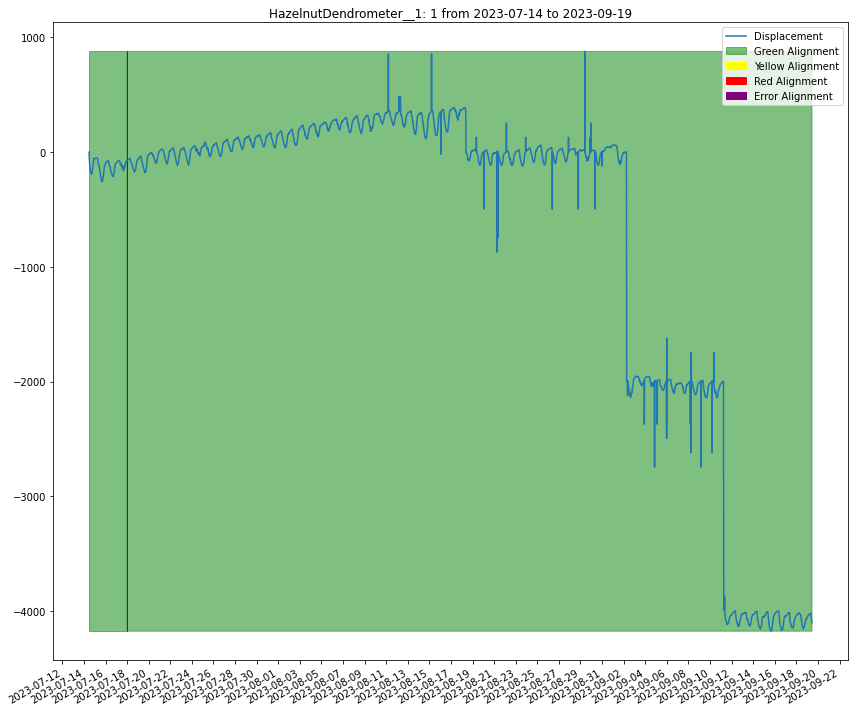

In [2]:
df, device_name = load_and_prepare_data('H1_complete.csv')  # also get device_name
df = calculate_differences(df)
    
calculate_and_print_stats(df)
plot_displacement(df, device_name)

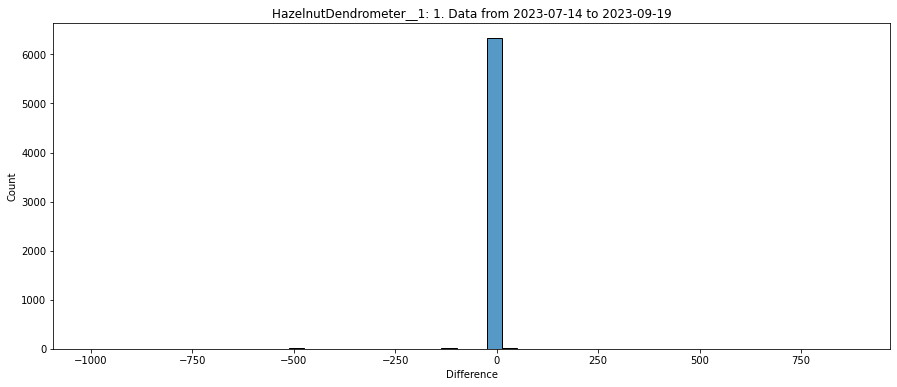

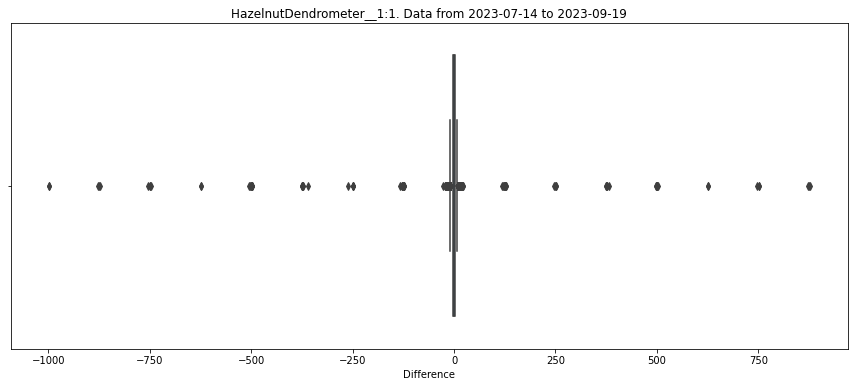

In [3]:
plot_histogram(df, device_name)
    


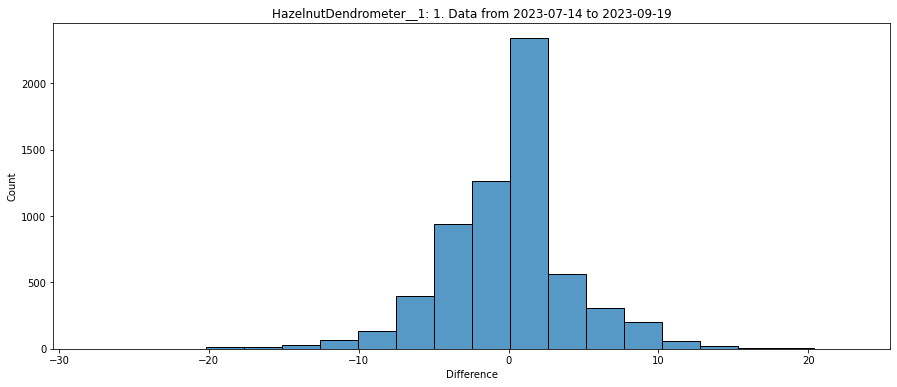

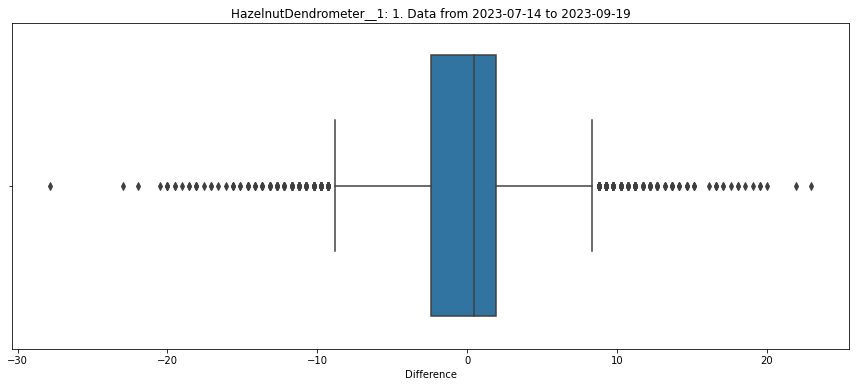

In [4]:

plot_cleaned_difference(df, device_name)


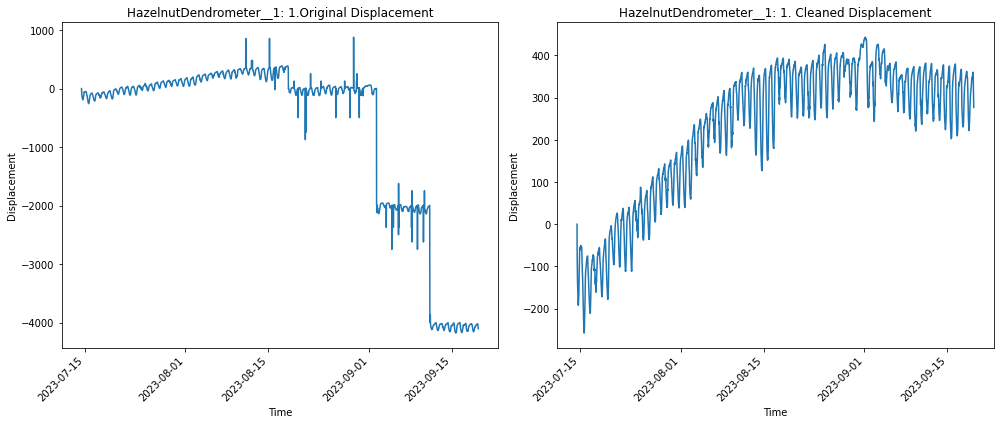

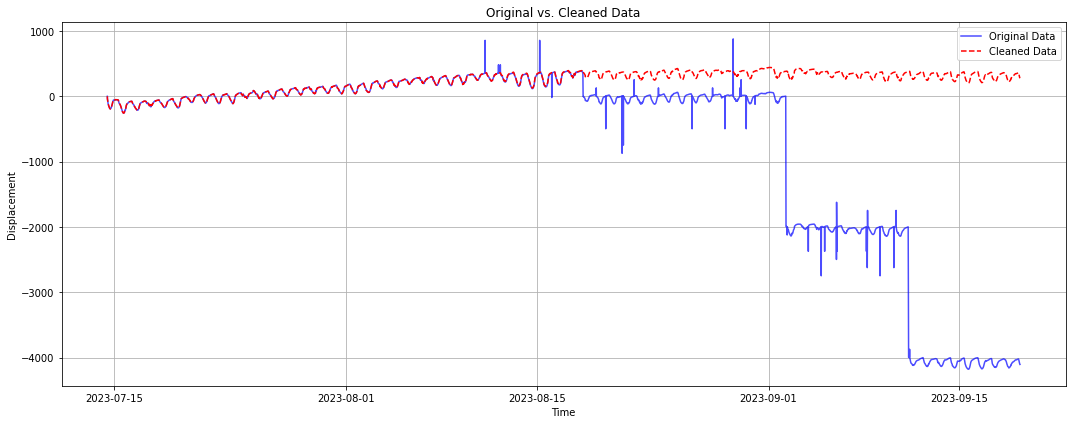

'identify_and_adjust_outliers_2(df)\nplot_cleaned_displacement(df, device_name)\n\n\nplot_original_vs_cleaned(df)'

In [5]:
identify_and_adjust_outliers(df)
plot_cleaned_displacement(df, device_name)

plot_original_vs_cleaned(df)

'''identify_and_adjust_outliers_2(df)
plot_cleaned_displacement(df, device_name)


plot_original_vs_cleaned(df)'''


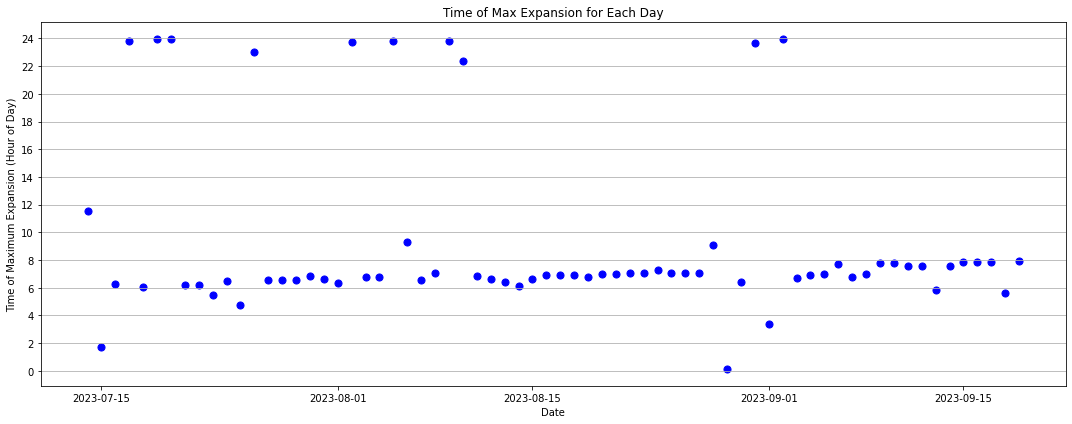

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Load your data (assuming you've defined load_and_prepare_data already)
df, device_name = load_and_prepare_data('H1_complete.csv')
df = identify_and_adjust_outliers(df)

# Assuming 'Cleaned Displacement' is a column with expansion values and 'time_local' is datetime

all_max_indices = []

# Group by each day and identify local maxima
# Assuming df is your dataframe and it has been processed as mentioned in previous code

# Group by the date and find the index of max displacement
idx = df.groupby(df['time_local'].dt.date)['Cleaned Displacement'].idxmax()

# Extract these maxima
daily_maxima = df.loc[idx]

# Convert the time of maxima to hours since midnight
daily_maxima_hours = daily_maxima['time_local'].dt.hour + daily_maxima['time_local'].dt.minute / 60 + daily_maxima['time_local'].dt.second / 3600

# Plotting
plt.figure(figsize=(15, 6))
plt.scatter(daily_maxima['time_local'].dt.date, daily_maxima_hours, s=50, color='blue', marker='o')  # adjust s for point size
plt.xlabel('Date')
plt.ylabel('Time of Maximum Expansion (Hour of Day)')
plt.yticks(np.arange(0, 25, 2))  # Setting y-ticks every 2 hours
plt.grid(axis='y')
plt.title('Time of Max Expansion for Each Day')
plt.tight_layout()
plt.show()



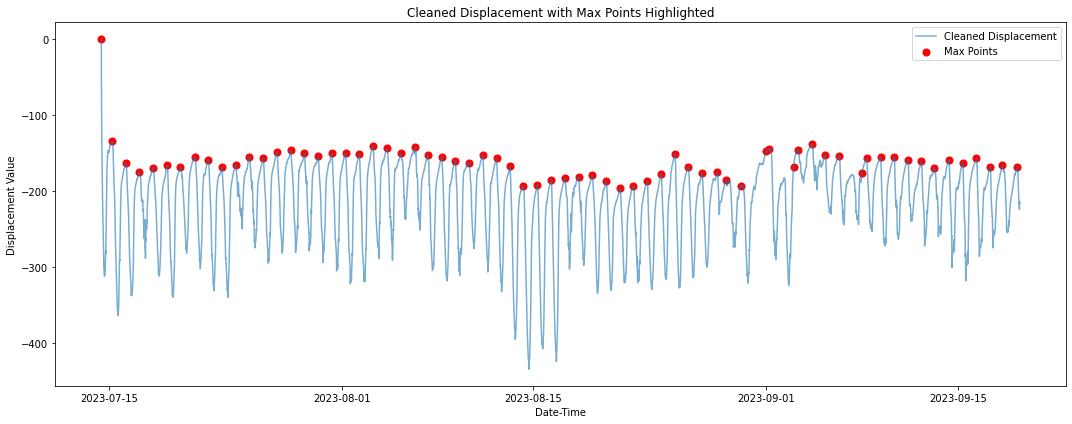

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Assuming you've defined load_and_prepare_data and identify_and_adjust_outliers

# Load your data
df, device_name = load_and_prepare_data('H6_complete.csv')
df = identify_and_adjust_outliers(df)

# Group by each day and identify local maxima
# Assuming df is your dataframe and it has been processed as mentioned in previous code

# Group by the date and find the index of max displacement
idx = df.groupby(df['time_local'].dt.date)['Cleaned Displacement'].idxmax()

# Extract these maxima
daily_maxima = df.loc[idx]

# Convert the time of maxima to hours since midnight
daily_maxima_hours = daily_maxima['time_local'].dt.hour + daily_maxima['time_local'].dt.minute / 60 + daily_maxima['time_local'].dt.second / 3600

# Plotting
plt.figure(figsize=(15, 6))

# Plot the actual displacement data
plt.plot(df['time_local'], df['Cleaned Displacement'], label='Cleaned Displacement', alpha=0.6)

# Overlay the maxima points in red
plt.scatter(daily_maxima['time_local'], daily_maxima['Cleaned Displacement'], s=50, color='red', label='Max Points')

plt.xlabel('Date-Time')
plt.ylabel('Displacement Value')
plt.title('Cleaned Displacement with Max Points Highlighted')
plt.legend()
plt.tight_layout()
plt.show()


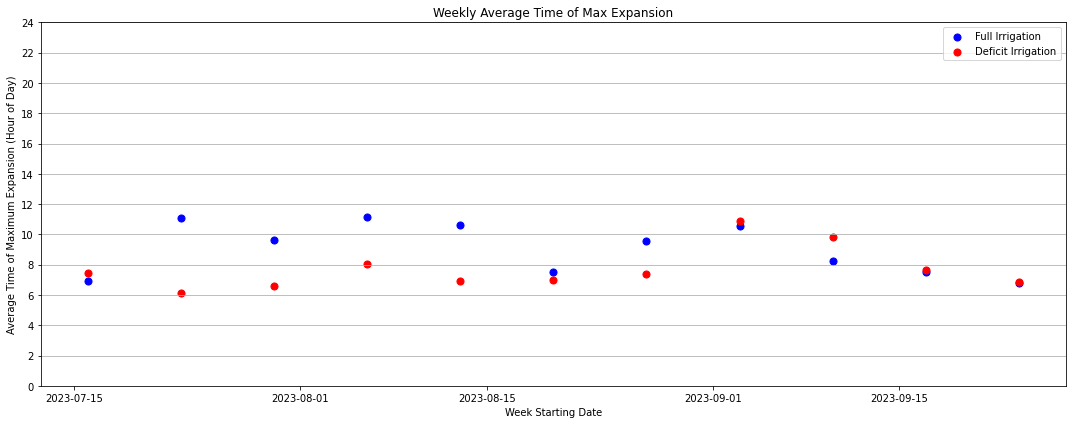

In [9]:
def process_files(files):
    all_dfs = []
    for file in files:
        df, device_name = load_and_prepare_data(file)
        df['time_local'] = pd.to_datetime(df['time_local'])
        df = identify_and_adjust_outliers(df)
        idx = df.groupby(df['time_local'].dt.date)['Cleaned Displacement'].idxmax()
        daily_maxima = df.loc[idx]
        daily_maxima_hours = daily_maxima['time_local'].dt.hour + daily_maxima['time_local'].dt.minute / 60 + daily_maxima['time_local'].dt.second / 3600
        daily_maxima_hours.index = daily_maxima['time_local'].dt.date
        all_dfs.append(daily_maxima_hours)
    
    result = pd.concat(all_dfs, axis=1)
    
    # Ensure the index is of type DatetimeIndex before resampling
    result.index = pd.to_datetime(result.index)
    
    # Computing weekly average
    weekly_avg = result.resample('W').mean().mean(axis=1)
    return weekly_avg


full_irrigation_avg = process_files(full_irrigation_files)
deficit_irrigation_avg = process_files(deficit_irrigation_files)

# Plotting
plt.figure(figsize=(15, 6))
plt.scatter(full_irrigation_avg.index, full_irrigation_avg.values, s=50, color='blue', label='Full Irrigation', marker='o')
plt.scatter(deficit_irrigation_avg.index, deficit_irrigation_avg.values, s=50, color='red', label='Deficit Irrigation', marker='o')

plt.xlabel('Week Starting Date')
plt.ylabel('Average Time of Maximum Expansion (Hour of Day)')
plt.yticks(np.arange(0, 25, 2))  # Setting y-ticks every 2 hours
plt.grid(axis='y')
plt.title('Weekly Average Time of Max Expansion')
plt.legend()
plt.tight_layout()
plt.show()


Index(['DATE', 'ARAO PP'], dtype='object')


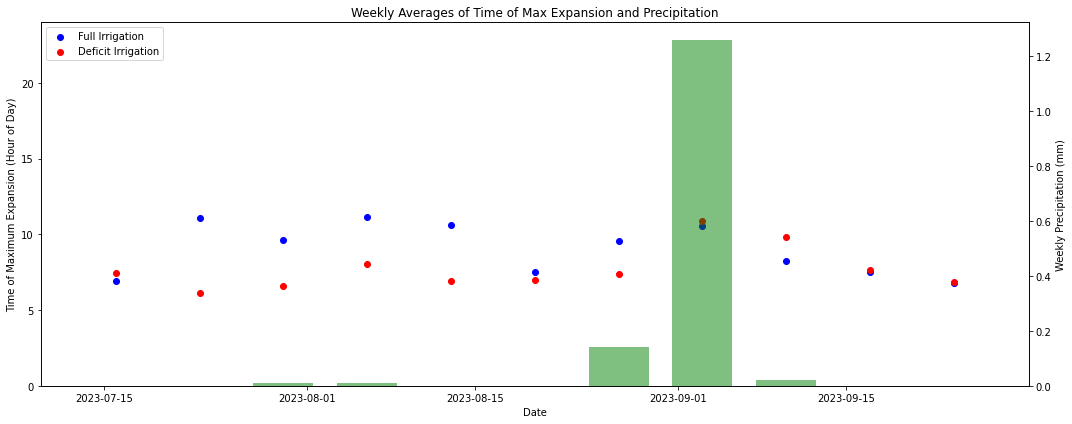

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax

def process_files(files):
    all_dfs = []
    for file in files:
        df, device_name = load_and_prepare_data(file)
        df['time_local'] = pd.to_datetime(df['time_local'])
        df = identify_and_adjust_outliers(df)
        idx = df.groupby(df['time_local'].dt.date)['Cleaned Displacement'].idxmax()
        daily_maxima = df.loc[idx]
        daily_maxima_hours = daily_maxima['time_local'].dt.hour + daily_maxima['time_local'].dt.minute / 60 + daily_maxima['time_local'].dt.second / 3600
        daily_maxima_hours.index = daily_maxima['time_local'].dt.date
        all_dfs.append(daily_maxima_hours)
    
    result = pd.concat(all_dfs, axis=1)
    
    # Ensure the index is of type DatetimeIndex before resampling
    result.index = pd.to_datetime(result.index)
    
    # Computing weekly average
    weekly_avg = result.resample('W').mean().mean(axis=1)
    return weekly_avg


full_irrigation_avg = process_files(full_irrigation_files)
deficit_irrigation_avg = process_files(deficit_irrigation_files)

# Load the precipitation data
precipitation_df = pd.read_excel('NWREC precipitation.xlsx', engine='openpyxl')

print(precipitation_df.columns)


precipitation_df['DATE'] = pd.to_datetime(precipitation_df['DATE'])



# Weekly resampling of the precipitation data to get total precipitation in each week
weekly_precipitation = precipitation_df.resample('W', on='DATE').sum()



# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Using ax1 for full and deficit irrigation averages
ax1.scatter(full_irrigation_avg.index, full_irrigation_avg, color='blue', label='Full Irrigation', marker='o')
ax1.scatter(deficit_irrigation_avg.index, deficit_irrigation_avg, color='red', label='Deficit Irrigation', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Time of Maximum Expansion (Hour of Day)', color='black')
ax1.set_ylim(0, 24)  # Assuming time ranges from 0 to 24 hours. Adjust if needed.
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Weekly Averages of Time of Max Expansion and Precipitation')
ax1.legend(loc='upper left')

# Using ax2 for precipitation data
ax2 = ax1.twinx()  # instantiate a second y-axis sharing the same x-axis
ax2.bar(weekly_precipitation.index, weekly_precipitation['ARAO PP'], color='g', width=5, label='Weekly Precipitation (mm)', align='center', alpha = 0.5)
ax2.set_ylabel('Weekly Precipitation (mm)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Display the plot
plt.tight_layout()
plt.show()
